In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
training_df = pd.read_csv('dengue_features_train.csv')
training_df.head

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
labels_df = pd.read_csv('dengue_labels_train.csv')
labels_df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
df = pd.merge(
    training_df,
    labels_df,
    on=['city', 'year', 'weekofyear'],
    how='left'
)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
print(df.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [8]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [9]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Time Series Model:
- splitting by city (SJ, IQ)
- 80/20 train test split for time series model
- train and test sets for each city

In [10]:
sj_data = df[df['city'] == 'sj'].copy()
iq_data = df[df['city'] == 'iq'].copy()

In [11]:
sj_split_idx = int(len(sj_data) * 0.8)
iq_split_idx = int(len(iq_data) * 0.8)

In [12]:
sj_train = sj_data.iloc[:sj_split_idx].copy()
sj_test = sj_data.iloc[sj_split_idx:].copy()

iq_train = iq_data.iloc[:iq_split_idx].copy()
iq_test = iq_data.iloc[iq_split_idx:].copy()

In [13]:
train_df = pd.concat([sj_train, iq_train], axis=0)
test_df = pd.concat([sj_test, iq_test], axis=0)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (1164, 25)
Test set shape: (292, 25)


In [14]:
print("\nSan Juan training period:")
print(f"Start: {sj_train['week_start_date'].min()}, End: {sj_train['week_start_date'].max()}")
print("San Juan test period:")
print(f"Start: {sj_test['week_start_date'].min()}, End: {sj_test['week_start_date'].max()}")

print("\nIquitos training period:")
print(f"Start: {iq_train['week_start_date'].min()}, End: {iq_train['week_start_date'].max()}")
print("Iquitos test period:")
print(f"Start: {iq_test['week_start_date'].min()}, End: {iq_test['week_start_date'].max()}")


San Juan training period:
Start: 1990-04-30 00:00:00, End: 2004-09-09 00:00:00
San Juan test period:
Start: 2004-09-16 00:00:00, End: 2008-04-22 00:00:00

Iquitos training period:
Start: 2000-07-01 00:00:00, End: 2008-06-24 00:00:00
Iquitos test period:
Start: 2008-07-01 00:00:00, End: 2010-06-25 00:00:00


# Feature Imputations:
- NDVI feature - create a copy to avoid changing the original df; imputations will be by city, and will be based on week-of-year patterns; will be replacing NaNs using the weekofyear median instead of mean to reduce the influence of outliers; will execute a forward/backward fill for any remaining missing values (NaNs).
- Precipitation features - will follow same steps as NDVI features
- Reanalysis features - these features are highly correlated (see EDA notebook), so I'm going to explore KNN to see if we can use clustering for feature reduction pertaining to reanalysis features

In [15]:
ndvi_columns = [col for col in train_df.columns if 'ndvi' in col]
print(f"NDVI columns to impute: {ndvi_columns}")

def impute_ndvi(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[ndvi_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in ndvi_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

train_imputed = impute_ndvi(train_df)
test_imputed = impute_ndvi(test_df)

print("\nMissing NDVI values in training set before imputation:")
print(train_df[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in training set after imputation:")
print(train_imputed[ndvi_columns].isnull().sum())

print("\nMissing NDVI values in test set before imputation:")
print(test_df[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in test set after imputation:")
print(test_imputed[ndvi_columns].isnull().sum())

NDVI columns to impute: ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

Missing NDVI values in training set before imputation:
ndvi_ne    158
ndvi_nw     44
ndvi_se     20
ndvi_sw     20
dtype: int64

Missing NDVI values in training set after imputation:
ndvi_ne    3
ndvi_nw    3
ndvi_se    3
ndvi_sw    3
dtype: int64

Missing NDVI values in test set before imputation:
ndvi_ne    36
ndvi_nw     8
ndvi_se     2
ndvi_sw     2
dtype: int64

Missing NDVI values in test set after imputation:
ndvi_ne    2
ndvi_nw    2
ndvi_se    2
ndvi_sw    2
dtype: int64


In [17]:
def handle_remaining_missing(df, columns):
    result_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_mask = result_df['city'] == city
        
        city_data = result_df[city_mask].sort_values('week_start_date')
        
        for col in columns:
            city_data[col] = city_data[col].fillna(method='ffill')
            city_data[col] = city_data[col].fillna(method='bfill')
            
        result_df.loc[city_mask] = city_data
    
    return result_df

train_imputed = handle_remaining_missing(train_imputed, ndvi_columns)
test_imputed = handle_remaining_missing(test_imputed, ndvi_columns)

print("\nMissing NDVI values in training set after forward/backward fill:")
print(train_imputed[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in test set after forward/backward fill:")
print(test_imputed[ndvi_columns].isnull().sum())


Missing NDVI values in training set after forward/backward fill:
ndvi_ne    0
ndvi_nw    0
ndvi_se    0
ndvi_sw    0
dtype: int64

Missing NDVI values in test set after forward/backward fill:
ndvi_ne    0
ndvi_nw    0
ndvi_se    0
ndvi_sw    0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

In [18]:
precip_columns = [
    'precipitation_amt_mm', 
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_precip_amt_kg_per_m2',
    'station_precip_mm'
]
print(f"Precipitation columns to impute: {precip_columns}")

print("\nMissing precipitation values in training set:")
print(train_imputed[precip_columns].isnull().sum())
print("\nMissing precipitation values in test set:")
print(test_imputed[precip_columns].isnull().sum())

Precipitation columns to impute: ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'station_precip_mm']

Missing precipitation values in training set:
precipitation_amt_mm               10
reanalysis_sat_precip_amt_mm       10
reanalysis_precip_amt_kg_per_m2     7
station_precip_mm                  15
dtype: int64

Missing precipitation values in test set:
precipitation_amt_mm               3
reanalysis_sat_precip_amt_mm       3
reanalysis_precip_amt_kg_per_m2    3
station_precip_mm                  7
dtype: int64


In [19]:
def impute_precipitation(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[precip_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in precip_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

train_imputed = impute_precipitation(train_imputed)
test_imputed = impute_precipitation(test_imputed)

train_imputed = handle_remaining_missing(train_imputed, precip_columns)
test_imputed = handle_remaining_missing(test_imputed, precip_columns)

print("\nMissing precipitation values in training set after imputation:")
print(train_imputed[precip_columns].isnull().sum())
print("\nMissing precipitation values in test set after imputation:")
print(test_imputed[precip_columns].isnull().sum())


Missing precipitation values in training set after imputation:
precipitation_amt_mm               0
reanalysis_sat_precip_amt_mm       0
reanalysis_precip_amt_kg_per_m2    0
station_precip_mm                  0
dtype: int64

Missing precipitation values in test set after imputation:
precipitation_amt_mm               0
reanalysis_sat_precip_amt_mm       0
reanalysis_precip_amt_kg_per_m2    0
station_precip_mm                  0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

In [20]:
reanalysis_columns = [col for col in train_df.columns
                      if 'reanalysis' in col and col not in precip_columns]
print(f"Reanalysis columns to analyze: {reanalysis_columns}")

Reanalysis columns to analyze: ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']


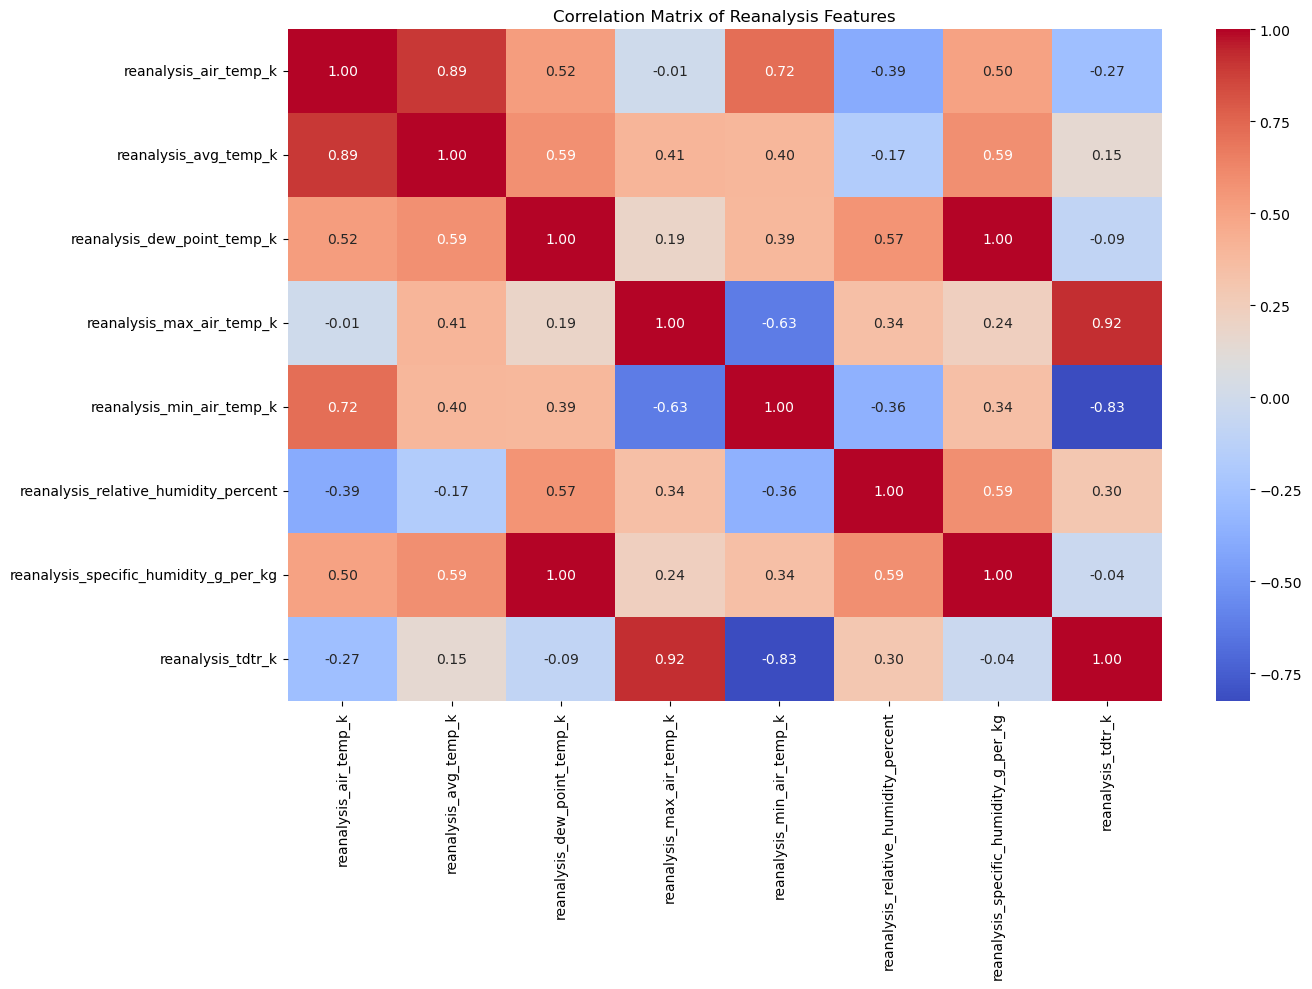

In [21]:
plt.figure(figsize=(14, 10))
reanalysis_corr = train_df[reanalysis_columns].corr()
sns.heatmap(reanalysis_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Reanalysis Features')
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

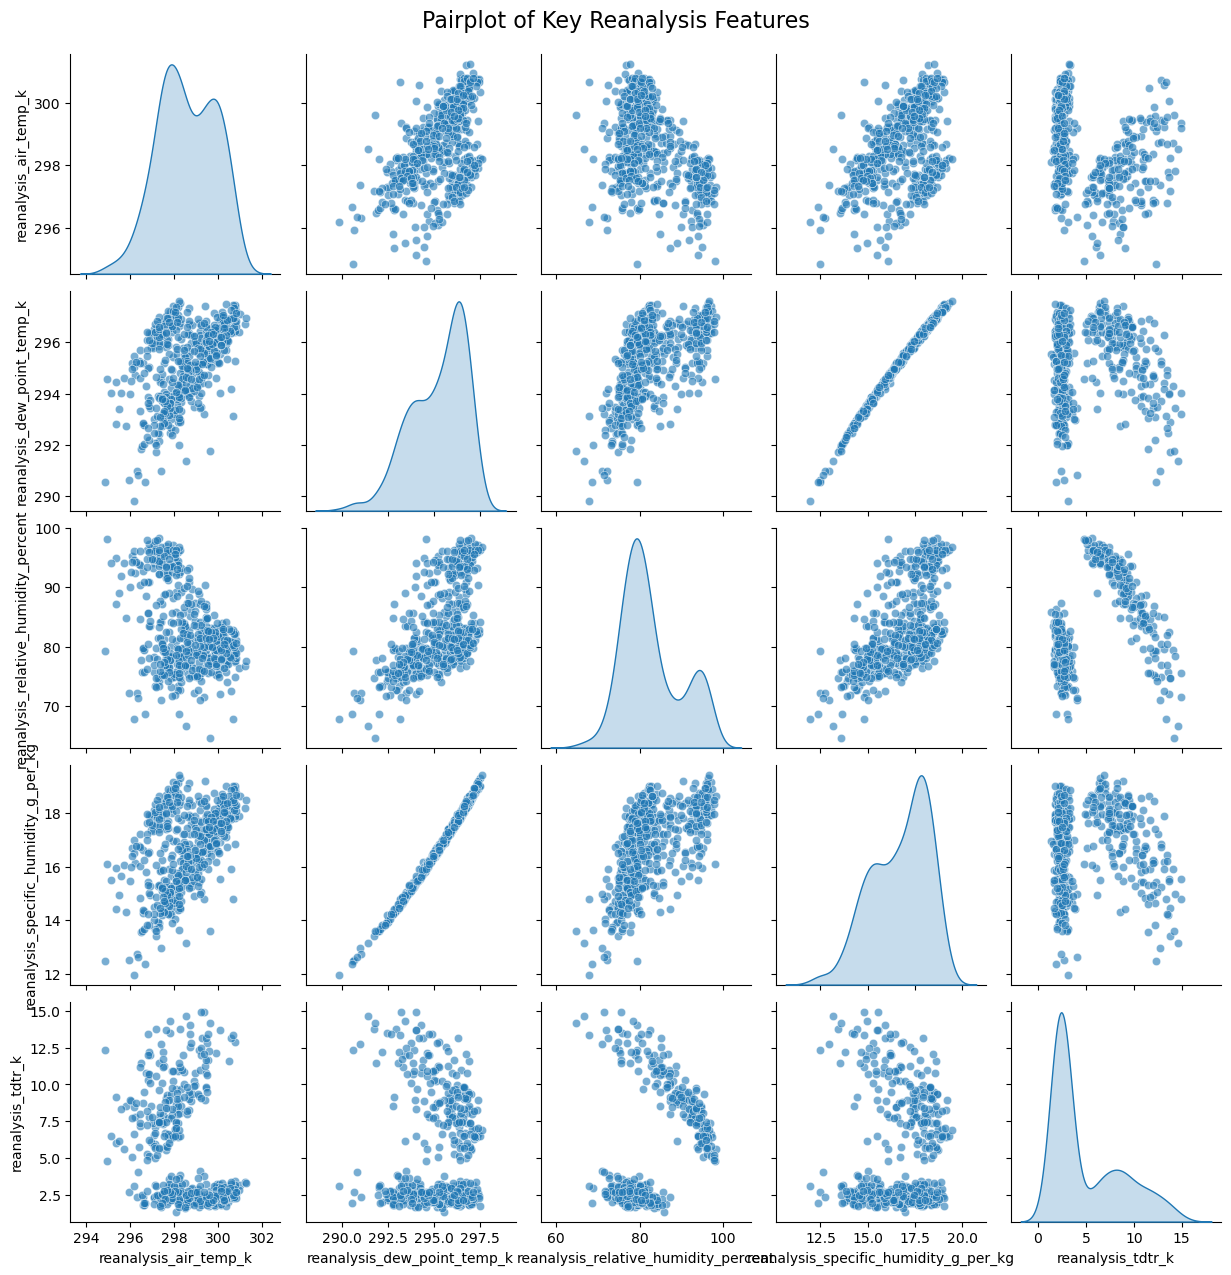

In [22]:
key_reanalysis = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']

plt.figure(figsize=(15, 12))
sns.pairplot(train_df[key_reanalysis].sample(500),
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Reanalysis Features', y=1.02, fontsize=16)
plt.show()

# Time Series Plot for San Juan of Reanalysis Features

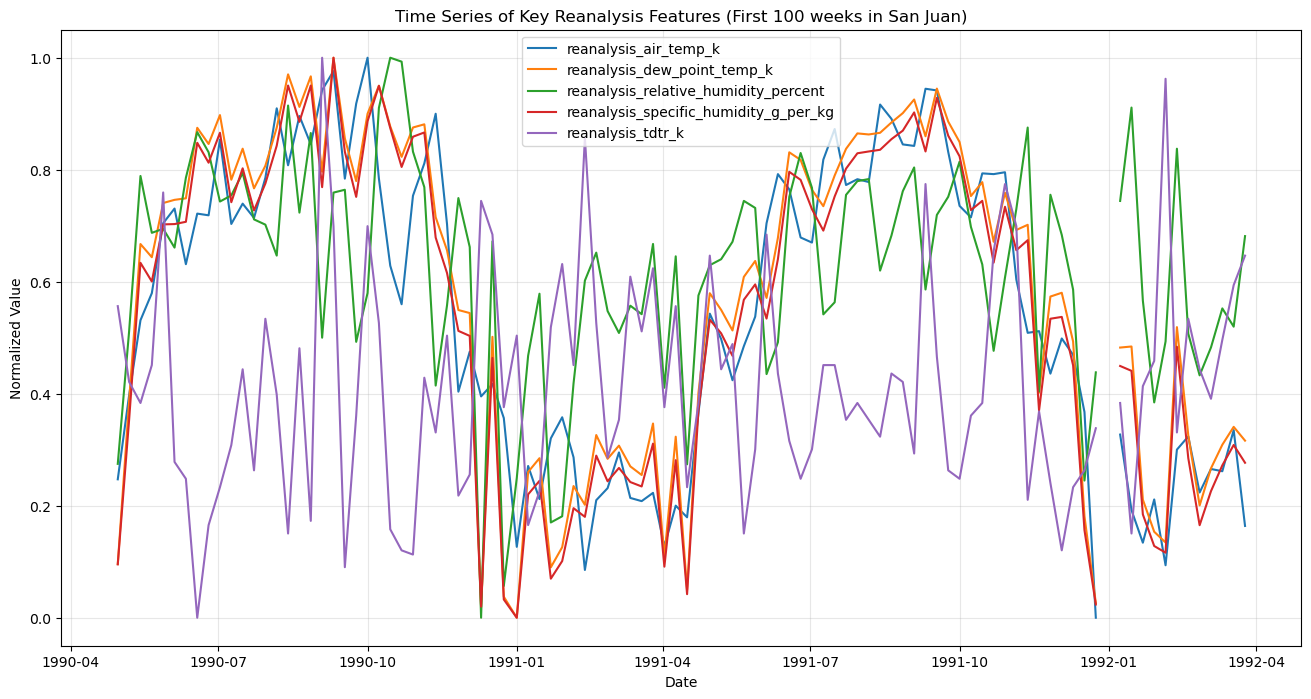

In [23]:
plt.figure(figsize=(16, 8))
sj_sample = train_df[train_df['city'] == 'sj'].iloc[:100]

for col in key_reanalysis:
    norm_values = (sj_sample[col] - sj_sample[col].min()) / (sj_sample[col].max() - sj_sample[col].min())
    plt.plot(sj_sample['week_start_date'], norm_values, label=col)
    
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Time Series of Key Reanalysis Features (First 100 weeks in San Juan)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interpreting Time Series Plot
- all climate variables show seasonal patterns w/ yearly cycles 
- air temperature (blue line) and dew point temperature (orange line) track very closely together, confirms the high correlation in the correlation matrix
- humidity (green line) moves in the same direction as temperature lines for the most part, it mostly diverges during the transition periods
- temperature diurnal range (purple line) has a different pattern for the most part from the other variables, it has higher variability and it's not as in sync with the other variables.

# Takeaways:
- Climate variables have strong seasonal patterns
- Clear relationships between almost all the variables, this will help with avoiding multicollinearity 
- Keep the diurnal temperature variable (reanalysis_tdtr_k) as the single temperature variable (reduce dimensionality). It represents avg. temp so it gives a more stable signal that min and max temp variables.
- Moving forward with KNN for reanalysis features due to the strong correlation among these features.

In [24]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

reanalysis_columns = [col for col in train_imputed.columns
                      if 'reanalysis' in col and col not in precip_columns]

print(f"Reanalysis columns to impute with KNN: {reanalysis_columns}")

Reanalysis columns to impute with KNN: ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']


In [25]:
def knn_impute_reanalysis(train_df, test_df, n_neighbors=5):
    train_imp = train_df.copy()
    test_imp = test_df.copy()
    
    for city in ['sj', 'iq']:
        print(f"\nProcessing {city} data...")
        
        train_city = train_imp[train_imp['city'] == city]
        test_city = test_imp[test_imp['city'] == city]
        
        train_features = train_city[['weekofyear']+ reanalysis_columns].copy()
        test_features = test_city[['weekofyear']+ reanalysis_columns].copy()
        
        scaler = StandardScaler()
        
        #mask for the non missing values
        non_missing_mask = ~train_features.isna().any(axis=1)
        if non_missing_mask.sum() > 0:
            scaler.fit(train_features[non_missing_mask])
        else:
            print(f"Warning: No complete rows found for {city}. Using all data for scaling.")
            temp_imputer = KNNImputer(n_neighbors=1) #Temporarily imputing here for scaling purposes!
            temp_data = temp_imputer.fit_transform(train_features)
            scaler.fit(temp_data)
        
        #scaling the columns individually because I can't scale directly with missing values    
        for col in train_features.columns:
            train_col_data = train_features[col].dropna().values.reshape(-1, 1)
            if len(train_col_data) > 0:
                col_mean = train_col_data.mean()
                col_std = train_col_data.std()
                if col_std > 0:
                    train_features.loc[~train_features[col].isna(), col] = (
                        (train_features.loc[~train_features[col].isna(), col] - col_mean) / col_std
                    )
                    test_features.loc[~test_features[col].isna(), col] = (
                        (test_features.loc[~test_features[col].isna(), col] - col_mean) / col_std
                    )
                    
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputer.fit(train_features)
        
        train_imputed_values = imputer.transform(train_features)
        test_imputed_values = imputer.transform(test_features)
        
        train_imputed_df = pd.DataFrame(train_imputed_values,
                                        columns=train_features.columns,
                                        index=train_city.index)
        test_imputed_df = pd.DataFrame(test_imputed_values,
                                       columns=test_features.columns,
                                       index=test_city.index)
        
        # reversing the standardization/unscaling the imputed values
        for i, col in enumerate(train_features.columns):
            train_col_data = train_features[col].dropna().values.reshape(-1, 1)
            if len(train_col_data) > 0:
                col_mean = train_col_data.mean()
                col_std = train_col_data.std()
                if col_std > 0:
                    train_imputed_df[col] = train_imputed_df[col] * col_std + col_mean
                    test_imputed_df[col] = test_imputed_df[col] * col_std + col_mean
                    
        for col in reanalysis_columns:
            train_imp.loc[train_city.index, col] = train_imputed_df[col]
            test_imp.loc[test_city.index, col] = test_imputed_df[col]
            
    return train_imp, test_imp

print("Applying KNN imputation to reanalysis features...")
train_imputed, test_imputed = knn_impute_reanalysis(train_imputed, test_imputed, n_neighbors=5)

print("\nMissing reanalysis values in training set after KNN imputation:")
print(train_imputed[reanalysis_columns].isnull().sum())
print("\nMissing reanalysis values in test set after KNN imputation:")
print(test_imputed[reanalysis_columns].isnull().sum())

Applying KNN imputation to reanalysis features...

Processing sj data...

Processing iq data...

Missing reanalysis values in training set after KNN imputation:
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
dtype: int64

Missing reanalysis values in test set after KNN imputation:
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/3412851676.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.57468564 -0.5073087  -0.43993176 -0.37255483 -0.30517789 -0.23780095
 -0.17042402 -0.10304708 -0.03567014  0.03170679  0.09908373  0.16646067
  0.2338376   0.30121454  0.36859148  0.43596842  0.50334535  0.57072229
  0.63809923  0.70547616  0.7728531   0.84023004  0.90760697  0.97498391
  1.04236085  1.10973778  1.17711472  1.24449166  1.31186859  1.37924553
  1.44662247  1.5139994   1.58137634  1.64875328  1.71613022 -1.72009356
 -1.65271663 -1.58533969 -1.51796275 -1.45058582 -1.38320888 -1.31583194
 -1.24845501 -1.18107807 -1.11370113 -1.0463242  -0.97894726 -0.91157032
 -0.84419339 -0.77681645 -0.70943951 -0.64206257 -0.57468564 -0.5073087
 -0.43993176 -0.37255483 -0.30517789 -0.23780095 -0.17042402 -0.10304708
 -0.03567014  0.03170679  0.09908373  0.16646067  0.2338376 

Generating PCA visualization...


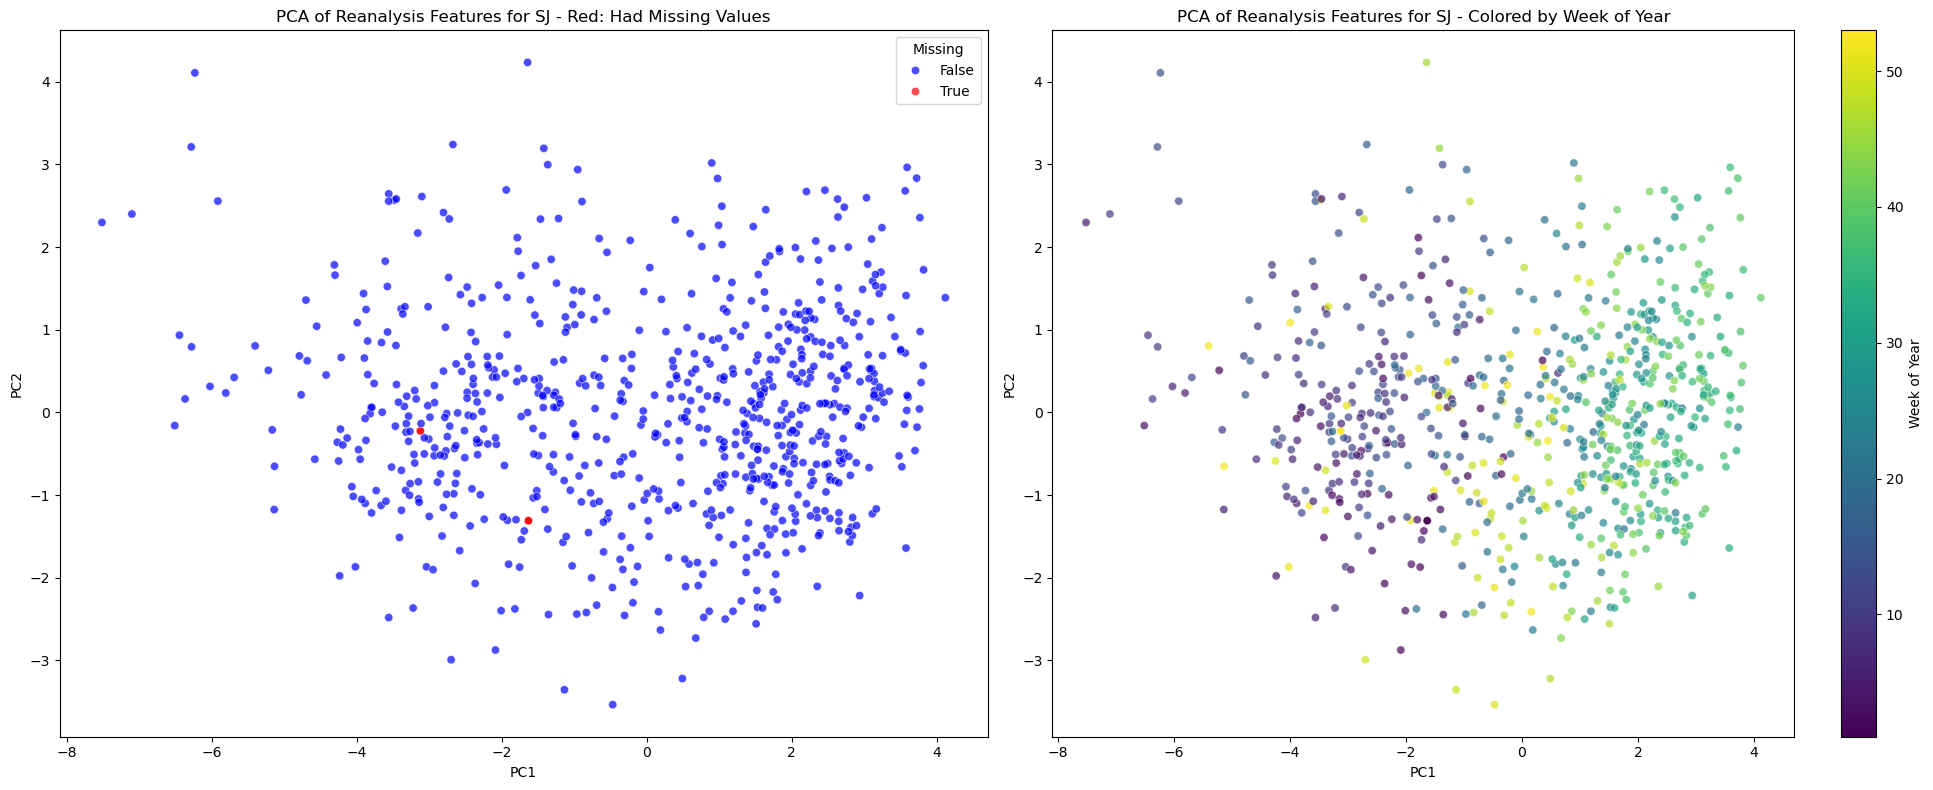

Generating t-SNE visualization (this may take a moment)...


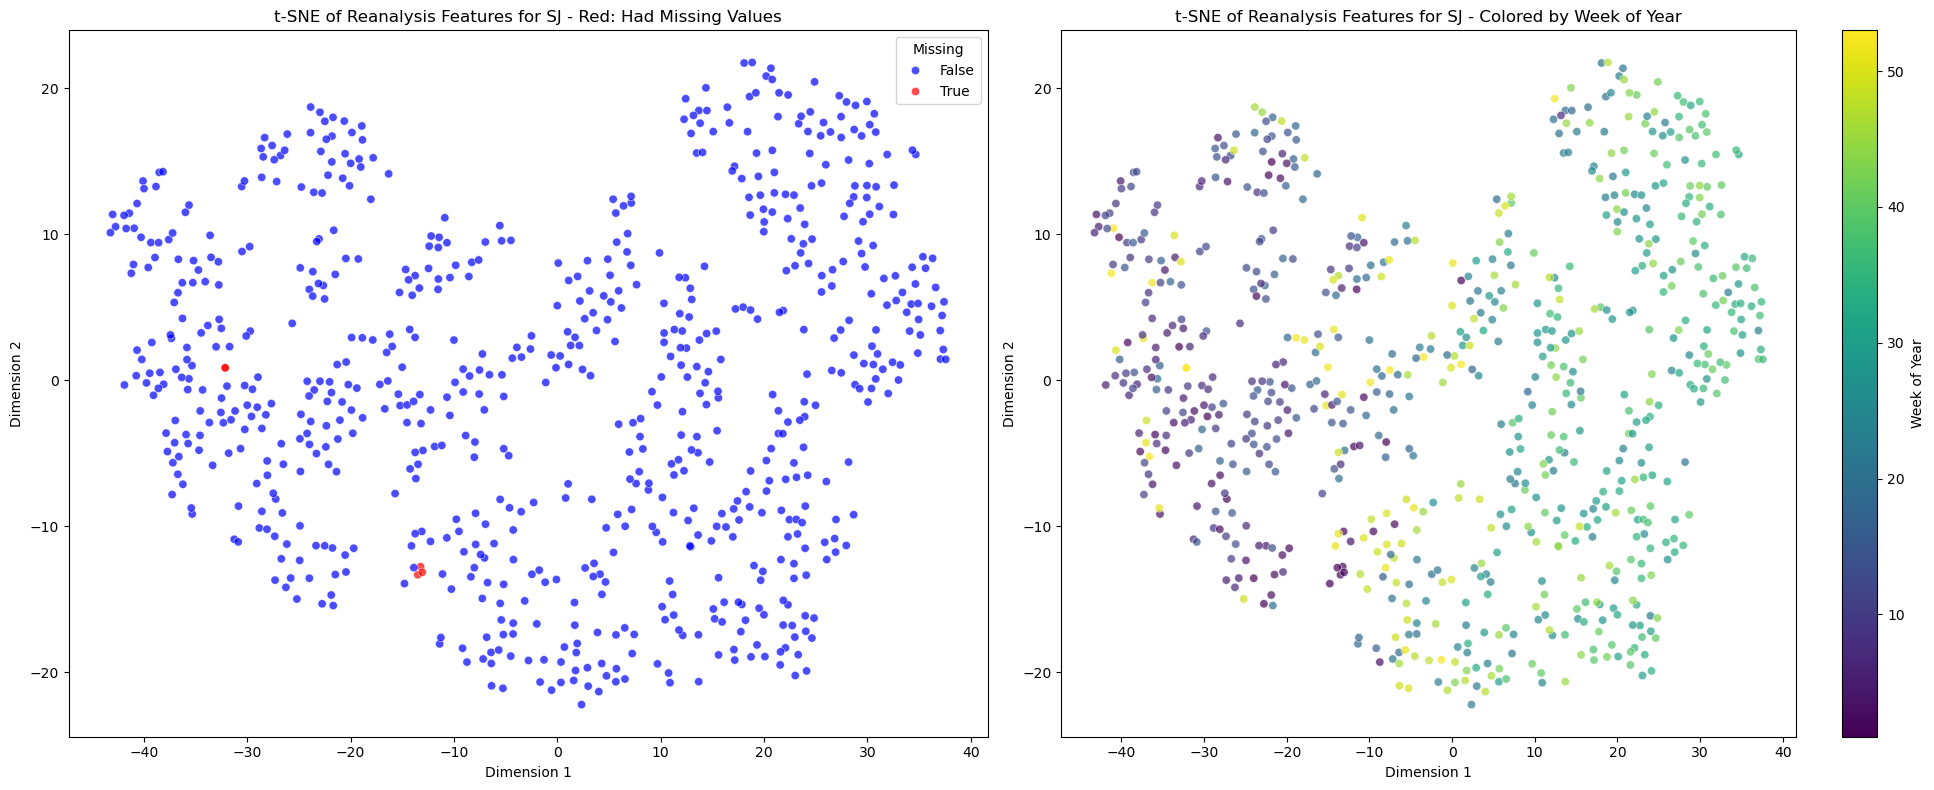

Generating PCA visualization...


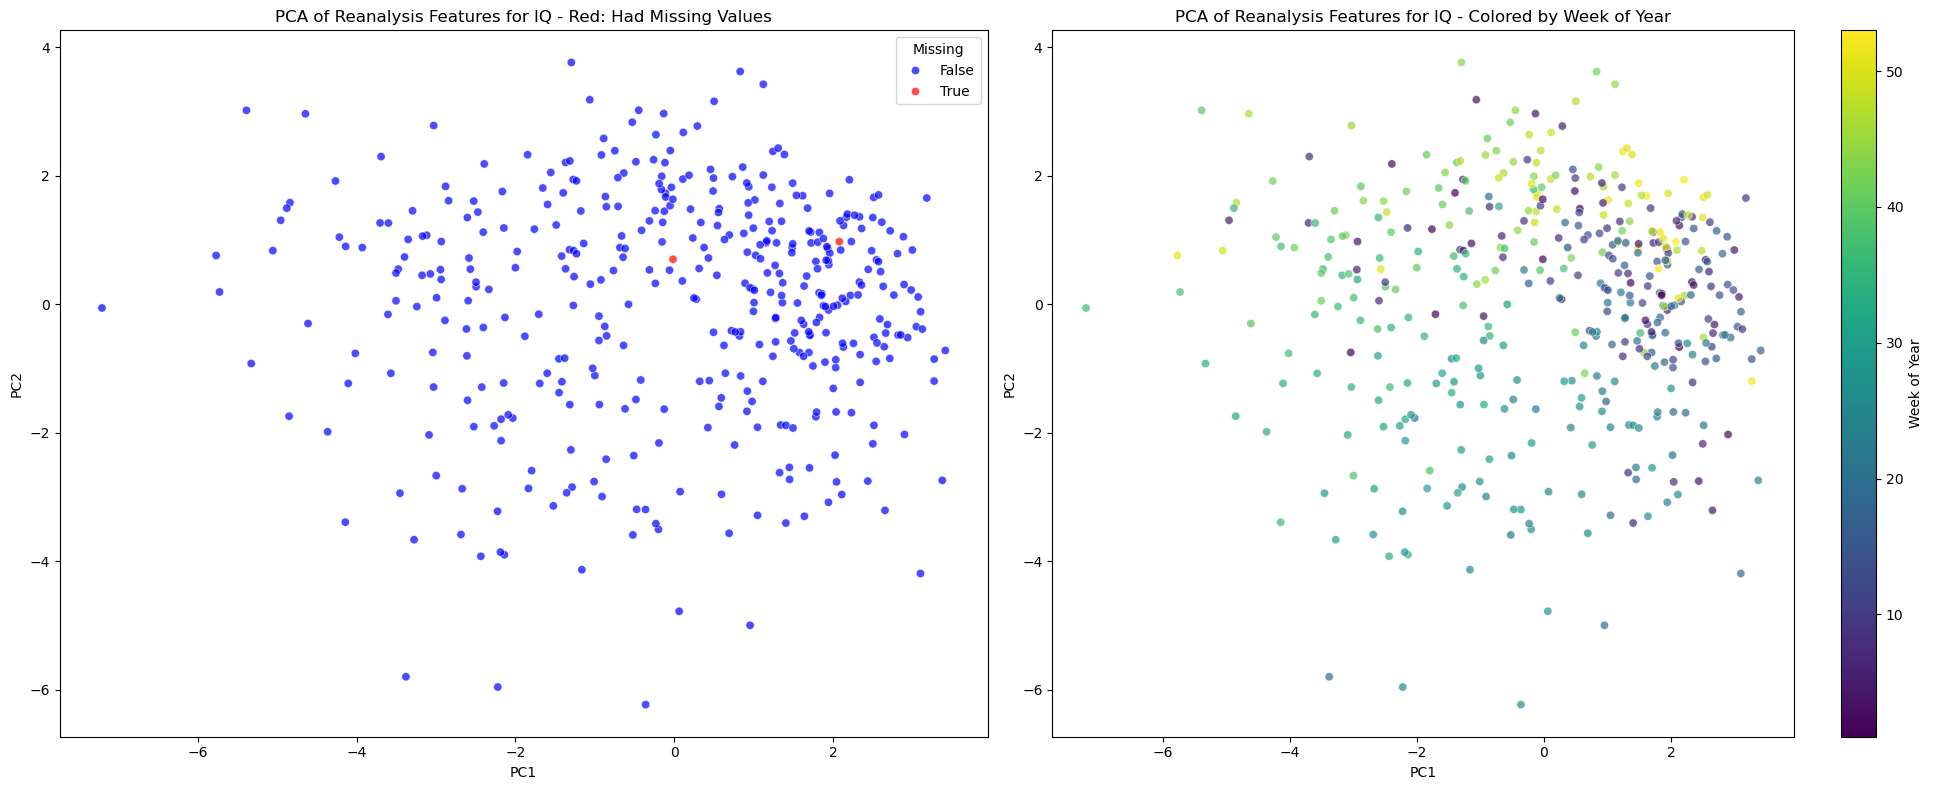

Generating t-SNE visualization (this may take a moment)...


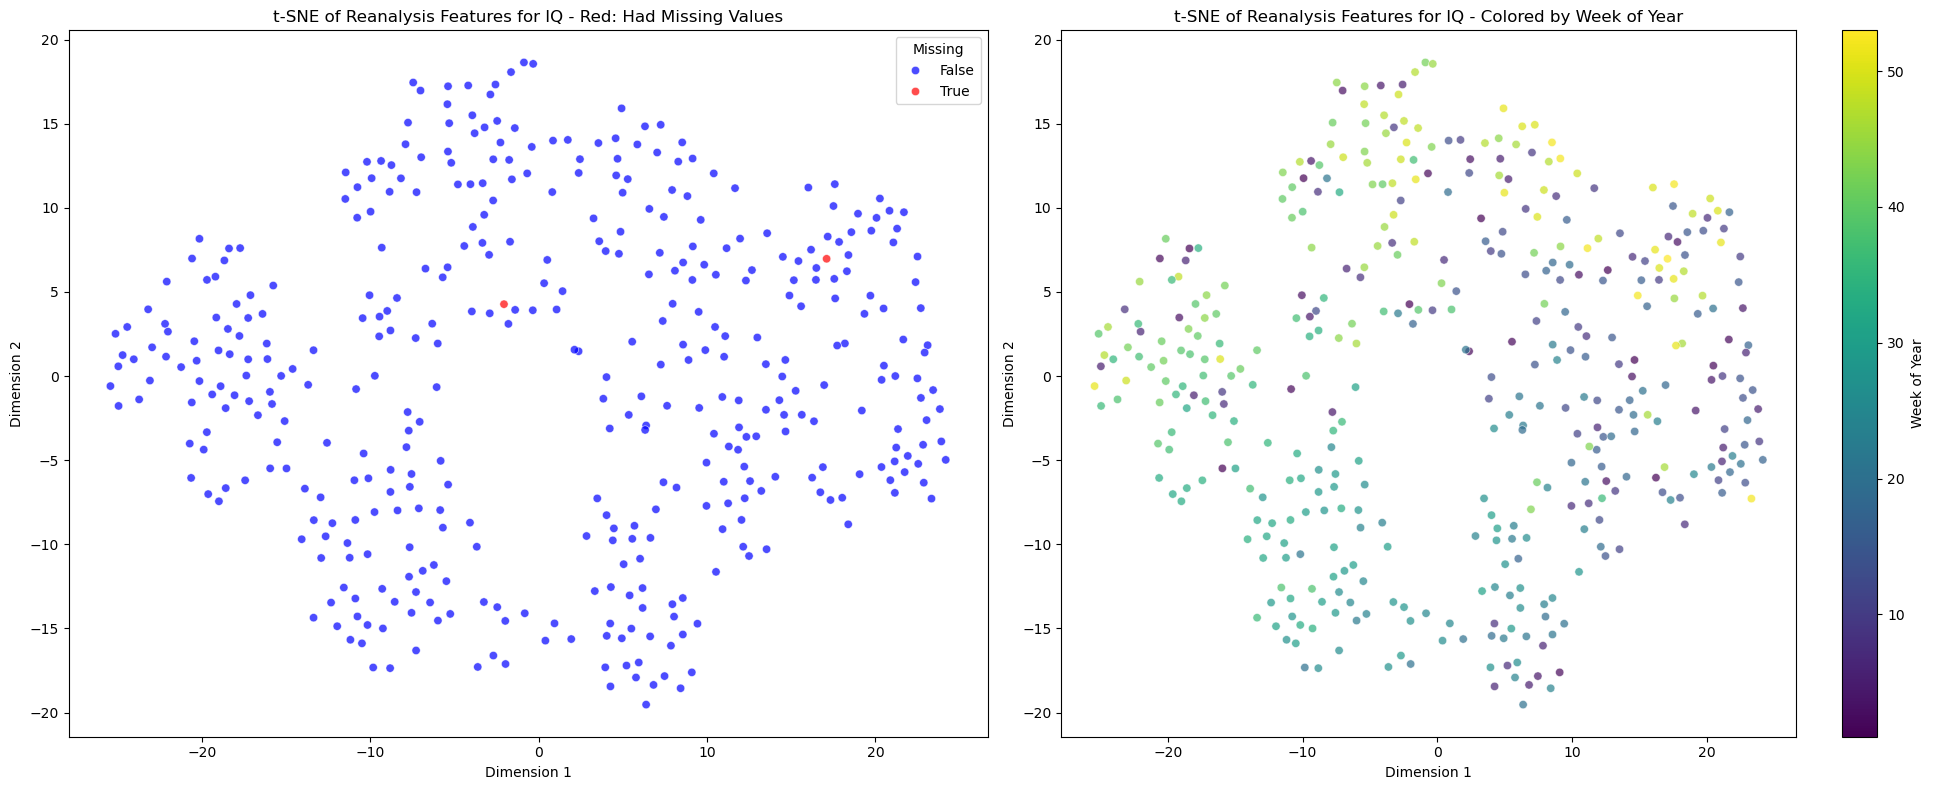

(PCA(n_components=2), TSNE(perplexity=30, random_state=42))

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_knn_imputation(df_original, df_imputed, feature_cols, city='sj'):
    # Filter data for the specified city
    original = df_original[df_original['city'] == city].copy()
    imputed = df_imputed[df_imputed['city'] == city].copy()
    
    # Create missing data mask for the original dataframe
    missing_mask = original[feature_cols].isna().any(axis=1)
    
    # Extract the feature data
    X_orig = original[feature_cols].copy()
    X_imp = imputed[feature_cols].copy()
    
    # 1. Principal Component Analysis (PCA) for 2D visualization
    print("Generating PCA visualization...")
    pca = PCA(n_components=2)
    
    # Fit PCA on the imputed data (no missing values)
    pca_result = pca.fit_transform(X_imp)
    
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame({
        'PC1': pca_result[:, 0],
        'PC2': pca_result[:, 1],
        'Missing': missing_mask,
        'Week': original['weekofyear']
    })
    
    # Plot PCA with points colored by missing status
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot by missing status
    sns.scatterplot(x='PC1', y='PC2', hue='Missing', 
                   data=pca_df, ax=axes[0], alpha=0.7,
                   palette={True: 'red', False: 'blue'})
    axes[0].set_title(f'PCA of Reanalysis Features for {city.upper()} - Red: Had Missing Values')
    
    # Plot by week of year to see seasonal patterns
    scatter = sns.scatterplot(x='PC1', y='PC2', hue='Week', 
                            data=pca_df, ax=axes[1], alpha=0.7,
                            palette='viridis', legend=False)
    axes[1].set_title(f'PCA of Reanalysis Features for {city.upper()} - Colored by Week of Year')
    
    # Add a colorbar for the week
    from matplotlib.cm import ScalarMappable
    from matplotlib.colors import Normalize
    sm = ScalarMappable(cmap='viridis', norm=Normalize(vmin=1, vmax=53))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1])
    cbar.set_label('Week of Year')
    
    plt.tight_layout()
    plt.show()
    
    # 2. t-SNE for potentially better cluster visualization
    print("Generating t-SNE visualization (this may take a moment)...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    
    # Apply t-SNE
    tsne_result = tsne.fit_transform(X_imp)
    
    # Create a DataFrame for plotting
    tsne_df = pd.DataFrame({
        'Dimension 1': tsne_result[:, 0],
        'Dimension 2': tsne_result[:, 1],
        'Missing': missing_mask,
        'Week': original['weekofyear']
    })
    
    # Plot t-SNE results
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot by missing status
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Missing', 
                   data=tsne_df, ax=axes[0], alpha=0.7,
                   palette={True: 'red', False: 'blue'})
    axes[0].set_title(f't-SNE of Reanalysis Features for {city.upper()} - Red: Had Missing Values')
    
    # Plot by week of year
    scatter = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Week', 
                            data=tsne_df, ax=axes[1], alpha=0.7,
                            palette='viridis', legend=False)
    axes[1].set_title(f't-SNE of Reanalysis Features for {city.upper()} - Colored by Week of Year')
    
    # Add a colorbar for the week
    sm = ScalarMappable(cmap='viridis', norm=Normalize(vmin=1, vmax=53))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1])
    cbar.set_label('Week of Year')
    
    plt.tight_layout()
    plt.show()
    
    return pca, tsne

# Compare original train_df with imputed train_imputed
# Keep a copy of the original dataframe for comparison
train_original = train_df.copy()

# Visualize for San Juan
visualize_knn_imputation(train_original, train_imputed, reanalysis_columns, city='sj')

# Visualize for Iquitos
visualize_knn_imputation(train_original, train_imputed, reanalysis_columns, city='iq')

In [27]:
# Station features imputation
# Using city-specific, week-of-year median approach similar to other features

# Identify station columns
station_columns = [col for col in train_imputed.columns if 'station' in col and col != 'station_precip_mm']
print(f"Station columns to impute: {station_columns}")

# Check missing values in station columns
print("\nMissing station values in training set:")
print(train_imputed[station_columns].isnull().sum())
print("\nMissing station values in test set:")
print(test_imputed[station_columns].isnull().sum())

# Function to impute station values by city and week of year using median
def impute_station(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[station_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in station_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

# Apply imputation
train_imputed = impute_station(train_imputed)
test_imputed = impute_station(test_imputed)

# Handle any remaining missing values
train_imputed = handle_remaining_missing(train_imputed, station_columns)
test_imputed = handle_remaining_missing(test_imputed, station_columns)

# Check final results
print("\nMissing station values in training set after imputation:")
print(train_imputed[station_columns].isnull().sum())
print("\nMissing station values in test set after imputation:")
print(test_imputed[station_columns].isnull().sum())

Station columns to impute: ['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']

Missing station values in training set:
station_avg_temp_c         36
station_diur_temp_rng_c    36
station_max_temp_c         14
station_min_temp_c         11
dtype: int64

Missing station values in test set:
station_avg_temp_c         7
station_diur_temp_rng_c    7
station_max_temp_c         6
station_min_temp_c         3
dtype: int64

Missing station values in training set after imputation:
station_avg_temp_c         0
station_diur_temp_rng_c    0
station_max_temp_c         0
station_min_temp_c         0
dtype: int64

Missing station values in test set after imputation:
station_avg_temp_c         0
station_diur_temp_rng_c    0
station_max_temp_c         0
station_min_temp_c         0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_4024/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

In [28]:
print("Remaining missing values in training set:")
print(train_imputed.isnull().sum().sum())
print("\nRemaining missing values in test set:")
print(test_imputed.isnull().sum().sum())

if train_imputed.isnull().sum().sum() == 0 and test_imputed.isnull().sum().sum() == 0:
    print("\nAll missing values have been successfully imputed!")
else:
    print("\nThere are still some missing values. Additional imputation may be needed.")
    # Show columns with missing values
    print("\nColumns with missing values in training set:")
    missing_cols_train = train_imputed.columns[train_imputed.isnull().any()].tolist()
    print(missing_cols_train)

    print("\nColumns with missing values in test set:")
    missing_cols_test = test_imputed.columns[test_imputed.isnull().any()].tolist()
    print(missing_cols_test)

# Save the fully prepared datasets to CSV
train_imputed.to_csv('dengue_train_cleaned.csv', index=False)
test_imputed.to_csv('dengue_test_cleaned.csv', index=False)

print("\nCleaned datasets saved to dengue_train_cleaned.csv and dengue_test_cleaned.csv")
# Display a sample of the final cleaned dataset
print("\nSample of the final cleaned training dataset:")
train_imputed.sample(5)

Remaining missing values in training set:
0

Remaining missing values in test set:
0

All missing values have been successfully imputed!

Cleaned datasets saved to dengue_train_cleaned.csv and dengue_test_cleaned.csv

Sample of the final cleaned training dataset:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
742,sj,2004,32,2004-08-05,0.005800,0.032700,0.174100,0.183814,35.99,1.288028,...,0.027767,35.99,0.992428,1.096968,28.528571,6.585714,32.2,24.4,12.8,20
745,sj,2004,35,2004-08-26,0.099600,0.063300,0.100657,0.109429,20.30,1.563709,...,0.222466,20.30,1.305579,0.400760,29.057143,6.485714,33.3,25.0,20.6,7
1265,iq,2006,43,2006-10-29,0.488229,0.368143,0.437743,0.378829,55.94,0.808546,...,0.206334,55.94,0.940699,-0.008653,27.560000,10.420000,33.8,19.8,143.3,6
660,sj,2003,2,2003-01-08,-0.200000,-0.070967,0.180550,0.182483,0.00,-0.389128,...,-0.076974,0.00,-0.390111,-0.870575,25.457143,6.657143,30.0,21.1,35.3,7
44,sj,1991,10,1991-03-05,0.210750,0.264100,0.247686,0.216357,0.00,-1.102010,...,-0.477775,0.00,-1.057544,-0.446797,26.014286,8.314286,31.1,20.6,10.9,21
